In [1]:
import re
import json
import unicodedata

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from adjustText import adjust_text
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', None)

In [2]:
DATA_DIR = './Leagues'

# Raw Data 처리

In [3]:
PL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/England-Premier-League"
L1 = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/France-Ligue-1"
GB = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Germany-Bundesliga"
SA = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Italy-Serie-A"
LL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Spain-LaLiga"

In [4]:
PL_PLAYER_STATS = f'{PL}/22-23_players_stats.csv'
L1_PLAYER_STATS = f'{L1}/22-23_players_stats.csv'
GB_PLAYER_STATS = f'{GB}/22-23_players_stats.csv'
SA_PLAYER_STATS = f'{SA}/22-23_players_stats.csv'
LL_PLAYER_STATS = f'{LL}/22-23_players_stats.csv'

PL_TEAM_STATS = f'{PL}/22-23_teams_stats.csv'
L1_TEAM_STATS = f'{L1}/22-23_teams_stats.csv'
GB_TEAM_STATS = f'{GB}/22-23_teams_stats.csv'
SA_TEAM_STATS = f'{SA}/22-23_teams_stats.csv'
LL_TEAM_STATS = f'{LL}/22-23_teams_stats.csv'

PL_PLAYER_VALUES = f'{PL}/22-23_players_values.csv'
L1_PLAYER_VALUES = f'{L1}/22-23_players_values.csv'
GB_PLAYER_VALUES = f'{GB}/22-23_players_values.csv'
SA_PLAYER_VALUES = f'{SA}/22-23_players_values.csv'
LL_PLAYER_VALUES = f'{LL}/22-23_players_values.csv'

PL_TEAM_VALUES = f'{PL}/22-23_teams_values.csv'
L1_TEAM_VALUES = f'{L1}/22-23_teams_values.csv'
GB_TEAM_VALUES = f'{GB}/22-23_teams_values.csv'
SA_TEAM_VALUES = f'{SA}/22-23_teams_values.csv'
LL_TEAM_VALUES = f'{LL}/22-23_teams_values.csv'

pl_player_stats_df = pd.read_csv(PL_PLAYER_STATS)
l1_player_stats_df = pd.read_csv(L1_PLAYER_STATS)
gb_player_stats_df = pd.read_csv(GB_PLAYER_STATS)
sa_player_stats_df = pd.read_csv(SA_PLAYER_STATS)
ll_player_stats_df = pd.read_csv(LL_PLAYER_STATS)

pl_team_stats_df = pd.read_csv(PL_TEAM_STATS)
l1_team_stats_df = pd.read_csv(L1_TEAM_STATS)
gb_team_stats_df = pd.read_csv(GB_TEAM_STATS)
sa_team_stats_df = pd.read_csv(SA_TEAM_STATS)
ll_team_stats_df = pd.read_csv(LL_TEAM_STATS)

pl_player_values_df = pd.read_csv(PL_PLAYER_VALUES)
l1_player_values_df = pd.read_csv(L1_PLAYER_VALUES)
gb_player_values_df = pd.read_csv(GB_PLAYER_VALUES)
sa_player_values_df = pd.read_csv(SA_PLAYER_VALUES)
ll_player_values_df = pd.read_csv(LL_PLAYER_VALUES)

pl_team_values_df = pd.read_csv(PL_TEAM_VALUES)
l1_team_values_df = pd.read_csv(L1_TEAM_VALUES)
gb_team_values_df = pd.read_csv(GB_TEAM_VALUES)
sa_team_values_df = pd.read_csv(SA_TEAM_VALUES)
ll_team_values_df = pd.read_csv(LL_TEAM_VALUES)

In [5]:
pl_team_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
l1_team_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
gb_team_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
sa_team_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
ll_team_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

pl_player_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
l1_player_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
gb_player_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
sa_player_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
ll_player_stats_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

pl_team_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
l1_team_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
gb_team_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
sa_team_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ll_team_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)

pl_player_values_df.drop(['Unnamed: 0'], axis=1, inplace=True) 
l1_player_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
gb_player_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
sa_player_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ll_player_values_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
pl_player_stats_df.drop_duplicates(subset=['player_name', 'team_name'], keep='first', inplace=True)
l1_player_stats_df.drop_duplicates(subset=['player_name', 'team_name'], keep='first', inplace=True)
gb_player_stats_df.drop_duplicates(subset=['player_name', 'team_name'], keep='first', inplace=True)
sa_player_stats_df.drop_duplicates(subset=['player_name', 'team_name'], keep='first', inplace=True)
ll_player_stats_df.drop_duplicates(subset=['player_name', 'team_name'], keep='first', inplace=True)

num_kyle_walker = pl_player_stats_df[pl_player_stats_df['player_name'] == 'Kyle Walker'].shape[0]
print(num_kyle_walker)

pl_player_stats_df.head()

1


,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yel,Red,...,Unsuccessful touches,Average_per_pass,Crosses_per_game,Longpass_per_game,Through_ball_per_game,xG,xGDiff,xGPerNinety,totalShots,xGPerShot
0,Asmir Begovic,Everton,36,GK,1,90,0,0,0,0,...,0.0,25.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Kevin De Bruyne,Man City,32,"M(CLR),FW",28(4),2425,7,16,1,0,...,1.3,42.4,2.0,2.5,0.5,4.93,2.07,0.18,65.0,0.08
2,Stefan Ortega,Man City,31,GK,3,270,0,0,0,0,...,0.0,50.3,0.0,7.3,0.0,NaN,NaN,NaN,NaN,NaN
3,Erling Haaland,Man City,23,FW,33(2),2779,36,8,5,0,...,1.5,13.7,0.0,0.1,0.1,30.88,5.12,1.00,123.0,0.25
4,Harry Kane,Tottenham,30,"AM(C),FW",38,3408,30,3,6,0,...,1.9,22.4,0.2,1.9,0.3,22.49,7.51,0.59,130.0,0.17


In [7]:
def team_name_mapper(player_df, team_df):
    player_teams_unique = sorted(player_df['team_name'].unique())
    team_teams_unique = sorted(team_df['team_name'].unique())

    team_name_dict = {}
    for pt, tt in zip(player_teams_unique, team_teams_unique):
        team_name_dict[pt] = tt
        # print(f"{pt} : {tt}")

    return team_name_dict


mapping_dict = team_name_mapper(pl_player_stats_df, pl_team_stats_df)
for key, value in mapping_dict.items():
    print(key, value)
pl_player_stats_df['team_name'] = pl_player_stats_df['team_name'].map(mapping_dict)

Arsenal Arsenal
Aston Villa Aston Villa
Bournemouth Bournemouth
Brentford Brentford
Brighton Brighton
Chelsea Chelsea
Crystal Palace Crystal Palace
Everton Everton
Fulham Fulham
Leeds Leeds
Leicester Leicester
Liverpool Liverpool
Man City Manchester City
Man Utd Manchester United
Newcastle Newcastle
Nottingham Forest Nottingham Forest
Southampton Southampton
Tottenham Tottenham
West Ham West Ham
Wolves Wolves


In [8]:
mapping_dict = team_name_mapper(l1_player_stats_df, l1_team_stats_df)
for key, value in mapping_dict.items():
    print(key, value)
l1_player_stats_df['team_name'] = l1_player_stats_df['team_name'].map(mapping_dict)

AC Ajaccio AC Ajaccio
Angers Angers
Auxerre Auxerre
Brest Brest
Clermont Foot Clermont Foot
Lens Lens
Lille Lille
Lorient Lorient
Lyon Lyon
Marseille Marseille
Monaco Monaco
Montpellier Montpellier
Nantes Nantes
Nice Nice
PSG Paris Saint-Germain
Reims Reims
Rennes Rennes
Strasbourg Strasbourg
Toulouse Toulouse
Troyes Troyes


In [9]:
mapping_dict = {
    "Augsburg": "Augsburg",
    "Leverkusen": "Bayer Leverkusen",
    "Bayern": "Bayern Munich",
    "Bochum": "Bochum",
    "Borussia Dortmund": "Borussia Dortmund",
    "Borussia M.Gladbach": "Borussia M.Gladbach",
    "Eintracht Frankfurt": "Eintracht Frankfurt",
    "FC Koln": "FC Koln",
    "Freiburg": "Freiburg",
    "Hertha Berlin": "Hertha Berlin",
    "Hoffenheim": "Hoffenheim",
    "Mainz": "Mainz 05",
    "RBL": "RB Leipzig",
    "Schalke": "Schalke 04",
    "Union Berlin": "Union Berlin",
    "Stuttgart": "VfB Stuttgart",
    "Werder Bremen": "Werder Bremen",
    "Wolfsburg": "Wolfsburg"
}

for key, value in mapping_dict.items():
    print(key, value)

gb_player_stats_df['team_name'] = gb_player_stats_df['team_name'].map(mapping_dict)

Augsburg Augsburg
Leverkusen Bayer Leverkusen
Bayern Bayern Munich
Bochum Bochum
Borussia Dortmund Borussia Dortmund
Borussia M.Gladbach Borussia M.Gladbach
Eintracht Frankfurt Eintracht Frankfurt
FC Koln FC Koln
Freiburg Freiburg
Hertha Berlin Hertha Berlin
Hoffenheim Hoffenheim
Mainz Mainz 05
RBL RB Leipzig
Schalke Schalke 04
Union Berlin Union Berlin
Stuttgart VfB Stuttgart
Werder Bremen Werder Bremen
Wolfsburg Wolfsburg


In [10]:
mapping_dict = team_name_mapper(sa_player_stats_df, sa_team_stats_df)
for key, value in mapping_dict.items():
    print(key, value)
sa_player_stats_df['team_name'] = sa_player_stats_df['team_name'].map(mapping_dict)

AC Milan AC Milan
Atalanta Atalanta
Bologna Bologna
Cremonese Cremonese
Empoli Empoli
Fiorentina Fiorentina
Inter Inter
Juventus Juventus
Lazio Lazio
Lecce Lecce
Monza Monza
Napoli Napoli
Roma Roma
Salernitana Salernitana
Sampdoria Sampdoria
Sassuolo Sassuolo
Spezia Spezia
Torino Torino
Udinese Udinese
Verona Verona


In [11]:
mapping_dict = team_name_mapper(ll_player_stats_df, ll_team_stats_df)
for key, value in mapping_dict.items():
    print(key, value)
ll_player_stats_df['team_name'] = ll_player_stats_df['team_name'].map(mapping_dict)

Almeria Almeria
Athletic Club Athletic Club
Atletico Atletico Madrid
Barcelona Barcelona
Cadiz Cadiz
Celta Vigo Celta Vigo
Elche Elche
Espanyol Espanyol
Getafe Getafe
Girona Girona
Mallorca Mallorca
Osasuna Osasuna
Rayo Vallecano Rayo Vallecano
Real Betis Real Betis
Real Madrid Real Madrid
Real Sociedad Real Sociedad
Real Valladolid Real Valladolid
Sevilla Sevilla
Valencia Valencia
Villarreal Villarreal


In [12]:
pl_player_stats_df.to_csv(f"{PL}/22-23_players_stats-cleaned.csv", index=False)
l1_player_stats_df.to_csv(f"{L1}/22-23_players_stats-cleaned.csv", index=False)
gb_player_stats_df.to_csv(f"{GB}/22-23_players_stats-cleaned.csv", index=False)
sa_player_stats_df.to_csv(f"{SA}/22-23_players_stats-cleaned.csv", index=False)
ll_player_stats_df.to_csv(f"{LL}/22-23_players_stats-cleaned.csv", index=False)

pl_team_stats_df.to_csv(f"{PL}/22-23_teams_stats-cleaned.csv", index=False)
l1_team_stats_df.to_csv(f"{L1}/22-23_teams_stats-cleaned.csv", index=False)
gb_team_stats_df.to_csv(f"{GB}/22-23_teams_stats-cleaned.csv", index=False)
sa_team_stats_df.to_csv(f"{SA}/22-23_teams_stats-cleaned.csv", index=False)
ll_team_stats_df.to_csv(f"{LL}/22-23_teams_stats-cleaned.csv", index=False)

pl_player_values_df.to_csv(f"{PL}/22-23_players_values-cleaned.csv", index=False)
l1_player_values_df.to_csv(f"{L1}/22-23_players_values-cleaned.csv", index=False)
gb_player_values_df.to_csv(f"{GB}/22-23_players_values-cleaned.csv", index=False)
sa_player_values_df.to_csv(f"{SA}/22-23_players_values-cleaned.csv", index=False)
ll_player_values_df.to_csv(f"{LL}/22-23_players_values-cleaned.csv", index=False)

pl_team_values_df.to_csv(f"{PL}/22-23_teams_values-cleaned.csv", index=False)
l1_team_values_df.to_csv(f"{L1}/22-23_teams_values-cleaned.csv", index=False)
gb_team_values_df.to_csv(f"{GB}/22-23_teams_values-cleaned.csv", index=False)
sa_team_values_df.to_csv(f"{SA}/22-23_teams_values-cleaned.csv", index=False)
ll_team_values_df.to_csv(f"{LL}/22-23_teams_values-cleaned.csv", index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [13]:
PL_TEAM_STATS = f'{PL}/22-23_teams_stats-cleaned.csv'
L1_TEAM_STATS = f'{L1}/22-23_teams_stats-cleaned.csv'
GB_TEAM_STATS = f'{GB}/22-23_teams_stats-cleaned.csv'
SA_TEAM_STATS = f'{SA}/22-23_teams_stats-cleaned.csv'
LL_TEAM_STATS = f'{LL}/22-23_teams_stats-cleaned.csv'

pl_team_stats_df = pd.read_csv(PL_TEAM_STATS)
l1_team_stats_df = pd.read_csv(L1_TEAM_STATS)
gb_team_stats_df = pd.read_csv(GB_TEAM_STATS)
sa_team_stats_df = pd.read_csv(SA_TEAM_STATS)
ll_team_stats_df = pd.read_csv(LL_TEAM_STATS)

pl_team_stats_df['League'] = 'England-Premier-League'
l1_team_stats_df['League'] = 'France-Ligue-1'
gb_team_stats_df['League'] = 'Germany-Bundesliga'
sa_team_stats_df['League'] = 'Italy-Serie-A'
ll_team_stats_df['League'] = 'Spain-LaLiga'

all_teams_stats = pd.concat([
    pl_team_stats_df,
    l1_team_stats_df,
    gb_team_stats_df,
    sa_team_stats_df,
    ll_team_stats_df    
], ignore_index=True)

print(all_teams_stats.head(10))
all_teams_stats.to_csv('./Leagues/all_teams_stats.csv', index=False)

           team_name   P   W   D   L  GF  GA  GD  Pts  Goals  ...  \
0    Manchester City  38  28   5   5  94  33  61   89     94  ...   
1            Arsenal  38  26   6   6  88  43  45   84     88  ...   
2  Manchester United  38  23   6   9  58  43  15   75     58  ...   
3          Newcastle  38  19  14   5  68  33  35   71     68  ...   
4          Liverpool  38  19  10   9  75  47  28   67     75  ...   
5           Brighton  38  18   8  12  72  53  19   62     72  ...   
6        Aston Villa  38  18   7  13  51  46   5   61     51  ...   
7          Tottenham  38  18   6  14  70  63   7   60     70  ...   
8          Brentford  38  15  14   9  58  46  12   59     58  ...   
9             Fulham  38  15   7  16  55  53   2   52     55  ...   

   Offsides pg  Shots OT pg  Dribbles pg  Fouled pg     xG  GoalsDiff  xGDiff  \
0          1.3          5.8          5.8        5.8  81.39         92   10.61   
1          1.5          5.4          5.4        5.4  71.36         84   12.64 

In [14]:
PL_PLAYER_STATS = f'{PL}/22-23_players_stats-cleaned.csv'
L1_PLAYER_STATS = f'{L1}/22-23_players_stats-cleaned.csv'
GB_PLAYER_STATS = f'{GB}/22-23_players_stats-cleaned.csv'
SA_PLAYER_STATS = f'{SA}/22-23_players_stats-cleaned.csv'
LL_PLAYER_STATS = f'{LL}/22-23_players_stats-cleaned.csv'

pl_players_stats_df = pd.read_csv(PL_PLAYER_STATS)
l1_players_stats_df = pd.read_csv(L1_PLAYER_STATS)
gb_players_stats_df = pd.read_csv(GB_PLAYER_STATS)
sa_players_stats_df = pd.read_csv(SA_PLAYER_STATS)
ll_players_stats_df = pd.read_csv(LL_PLAYER_STATS)

all_players_stats = pd.concat([
    pl_players_stats_df,
    l1_players_stats_df,
    gb_players_stats_df,
    sa_players_stats_df,
    ll_players_stats_df,    
])

all_players_stats.head(10)
all_players_stats.to_csv('./Leagues/all_players_stats.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [15]:
PL_TEAM_VALUES = f'{PL}/22-23_teams_values-cleaned.csv'
L1_TEAM_VALUES = f'{L1}/22-23_teams_values-cleaned.csv'
GB_TEAM_VALUES = f'{GB}/22-23_teams_values-cleaned.csv'
SA_TEAM_VALUES = f'{SA}/22-23_teams_values-cleaned.csv'
LL_TEAM_VALUES = f'{LL}/22-23_teams_values-cleaned.csv'

pl_team_values_df = pd.read_csv(PL_TEAM_VALUES)
l1_team_values_df = pd.read_csv(L1_TEAM_VALUES)
gb_team_values_df = pd.read_csv(GB_TEAM_VALUES)
sa_team_values_df = pd.read_csv(SA_TEAM_VALUES)
ll_team_values_df = pd.read_csv(LL_TEAM_VALUES)

all_teams_values = pd.concat([
    pl_team_values_df,
    l1_team_values_df,
    gb_team_values_df,
    sa_team_values_df,
    ll_team_values_df,    
])

all_teams_values.head(10)
all_teams_values.to_csv('./Leagues/all_teams_values.csv', index=False)

In [16]:
PL_PLAYER_VALUES = f'{PL}/22-23_players_values-cleaned.csv'
L1_PLAYER_VALUES = f'{L1}/22-23_players_values-cleaned.csv'
GB_PLAYER_VALUES = f'{GB}/22-23_players_values-cleaned.csv'
SA_PLAYER_VALUES = f'{SA}/22-23_players_values-cleaned.csv'
LL_PLAYER_VALUES = f'{LL}/22-23_players_values-cleaned.csv'

pl_player_values_df = pd.read_csv(PL_PLAYER_VALUES)
l1_player_values_df = pd.read_csv(L1_PLAYER_VALUES)
gb_player_values_df = pd.read_csv(GB_PLAYER_VALUES)
sa_player_values_df = pd.read_csv(SA_PLAYER_VALUES)
ll_player_values_df = pd.read_csv(LL_PLAYER_VALUES)

all_players_values = pd.concat([
    pl_player_values_df,
    l1_player_values_df,
    gb_player_values_df,
    sa_player_values_df,
    ll_player_values_df,    
])

all_players_values.head(10)
all_players_values.to_csv('./Leagues/all_players_values.csv', index=False)

In [17]:
DETAILED_LIST = [
    ## Defensive
    'Tackles',
    'Interception',
    'Fouls',
    'Cards',
    'Offsides',
    'Clearances',
    'Blocks',
    'Saves',

    ## Offensive
    'Shots',
    'Goals',
    'Dribbles',
    'Possession loss',
    'Aerial',

    ## Passing
    'Passes',
    'Key passes',
    'Assists'
]

def read_detailed_csv(path):
    detailed = DETAILED_LIST[0]
    df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
    for detailed in DETAILED_LIST[1:]:
        next_df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
        df = pd.merge(df, next_df, on=['player_name', 'team_name'], how='inner')
    
    return df

pl_player_detailed_df = read_detailed_csv(PL)
l1_player_detailed_df = read_detailed_csv(L1)
gb_player_detailed_df = read_detailed_csv(GB)
sa_player_detailed_df = read_detailed_csv(SA)
ll_player_detailed_df = read_detailed_csv(LL)

all_players_details = pd.concat([
    pl_player_detailed_df,
    l1_player_detailed_df,
    gb_player_detailed_df,
    sa_player_detailed_df,
    ll_player_detailed_df,    
])

all_players_details.head(10)
all_players_details.to_csv('./Leagues/all_players_stats_details.csv', index=False)

In [18]:
ALIASES = {
    'Alisson Becker' : 'Alisson',
    'Thiago Alcântara' : 'Thiago',
    'Kepa' : 'Kepa Arrizabalaga',
    'Hamed Traorè' : 'Hamed Junior Traorè',
    'Andy Robertson' : 'Andrew Robertson',
    'Maximilian Kilman' : 'Max Kilman',
    'Toti Gomes' : 'Toti', 
    'Willy-Arnaud Boly' : 'Willy Boly',
    'Dan Bentley' : 'Daniel Bentley',
    'Vitalii Mykolenko' : 'Vitaliy Mykolenko',
    'Sam Amo-Ameyaw' : 'Samuel Amo-Ameyaw',
    'Kostas Tsimikas' : 'Konstantinos Tsimikas',
    'Alex Oxlade Chamberlain' : 'Alex Oxlade-Chamberlain',
    'Mykhailo Mudryk' : 'Mykhaylo Mudryk',
    'Illia Zabarnyi' : 'Ilya Zabarnyi',
    'Pape Sarr' : 'Pape Matar Sarr',
    'Mads Bech' : 'Mads Bech Sörensen',
    "Odeluga Offiah" : "Odel Offiah",
    "Karl Toko-Ekambi" : "Karl Toko Ekambi",
    "Alexsandro Ribeiro" : "Alexsandro",
    "Karl Toko-Ekambi" : "Karl Toko Ekambi",
    "Cheick Keita" : "Check Keita",
    "Yusuf Yazici" : "Yusuf Yazıcı",
    "Henrique" : "Henrique Silva",
    "Mickaël Barreto" : "Michaël Barreto",
    "Ruan" : "Ruan Levine",
    "Ben Touré" : "Ben Hamed Touré",
    "Noah Holm" : "Noah Jean Holm",
    "Eli Kroupi" : "Eli Junior Kroupi",
    "Rémy Labeau-Lascary" : "Rémy Labeau Lascary",
    "Valentin Atangana Edoa" : "Valentin Atangana",
    "Eric Choupo-Moting" : "Eric-Maxim Choupo-Moting",
    "Frederik Rønnow" : "Frederik Rönnow",
    "John Anthony Brooks" : "John Brooks",
    "Silas Katompa Mvumpa" : "Silas",
    "Jordan Siebatcheu" : "Jordan",
    "Mehmet Aydin" : "Mehmet Aydın",
    "Finn Becker" : "Finn Ole Becker",
    "Juan José Perea" : "Juan-José Perea",
    "Dikeni-Rafid Salifou" : "Dikeni Salifou",
    "Jean-Manuel Mbom" : "Jean Manuel Mbom",
    "Lucas Martínez" : "Lucas Martínez Quarta",
    "Ibañez" : "Roger Ibañez",
    "Giorgos Kyriakopoulos" : "Georgios Kyriakopoulos",
    "Giorgos Kyriakopoulos" : "",
    "José Palomino" : "José Luis Palomino",
    "Pawel Dawidowicz" : "Paweł Dawidowicz",
    "Przemyslaw Wisniewski" : "Przemysław Wiśniewski",
    "Simon Kjær" : "Simon Kjaer",
    "Joakim Mæhle" : "Joakim Maehle",
    "Igor Julio" : "Igor",
    "Hamed Traorè" : "Hamed Junior Traorè",
    "Nicolò Cocetta" : "Niccolò Cocetta",
    "Alberto Basso" : "Alberto Basso Ricci",
    "Emil Ceïde" : "Emil Konradsen Ceide",
    "Salvador Ferrer" : "Salva Ferrer",
    "Antonio Iervolino" : "Antonio Pio Iervolino",
    "Thórir Helgason" : "Thórir Jóhann Helgason",
    "Marios Oikonomou" : "Marios Ikonomou",
    "Christian Gytkjær" : "Christian Gytkjaer",
    "Mikael Ellertsson" : "Mikael Egill Ellertsson",
    "José Giménez" : "José María Giménez",
    "Reinildo" : "Reinildo Mandava",
    "Adri Embarba" : "Adrián Embarba",
    "Anuar Tuhami" : "Anuar",
    "Copete" : "José Copete",
    "Adri Embarba" : "Adrián Embarba",
    "Valentín Castellanos" : "Taty Castellanos",
    "Vinicius Souza" : "Vini Souza",
    "Nacho" : "Nacho Fernández",
    "Djené Dakonam" : "Djené",
    "Álex Pozo" : "Alejandro Pozo",
    "Dani Carvajal" : "Daniel Carvajal",
    "Yassine Bounou" : "Bono",
    "Jon Olasagasti" : "Jon Ander Olasagasti",
    "Rober" : "Rober González",
    "Anthony Lozano" : "Choco Lozano",
    "Malcom Adu" : "Adu Ares",
    "Mamadou Fall" : "Mamadou Mbacke",
    "José Mari Martín" : "José Mari",
    "Nabili Zoubdi Touaizi" : "Nabil Touaizi",
    "Simo" : "Simo Keddari",
    "Marezi" : "Marko Milovanovic",
}

def normalize_names(name):
    """이름을 정규화하여 비교가능한 형태로 만듦."""
    name = unicodedata.normalize('NFKD', name).encode('ascii', errors='ignore').decode('ascii')
    name = re.sub(r'[^\w\s]', '', name).lower()
    name_parts = name.split()
    name_parts.sort()
    return ' '.join(name_parts)

def apply_aliases(name):
    """별칭을 적용하여 데이터의 일관성을 높임."""
    normalized_name = name.strip().title()
    return ALIASES.get(normalized_name, normalized_name)

# 데이터에 별칭 먼저 적용
all_players_stats['player_name'] = all_players_stats['player_name'].apply(apply_aliases)
all_players_values['Name'] = all_players_values['Name'].apply(apply_aliases)

# 정규화된 이름 적용
all_players_stats['normalized_name'] = all_players_stats['player_name'].apply(normalize_names)
all_players_values['normalized_name'] = all_players_values['Name'].apply(normalize_names)

# 병합 진행
merged_data = pd.merge(all_players_stats, all_players_values[['normalized_name', 'Position']], on='normalized_name', how='left')
merged_data['position'] = merged_data['Position']

merged_data = merged_data.dropna(subset=['position'])
position_cols = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
merged_data = merged_data.drop(columns=['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6', 'normalized_name', 'Position'], errors='ignore')

all_players_details['player_name'] = merged_data['player_name']
all_players_details['team_name'] = merged_data['team_name']
all_players_details = all_players_details.drop(columns=['normalize_names', 'normalized_name'], errors='ignore')

all_players_stats = merged_data
merged_data.to_csv('./Leagues/all_players_stats.csv', index=False)
all_players_details.to_csv('./Leagues/all_players_stats_details.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


# Market Value 반영

In [19]:
DATA_DIR = './Leagues'

TARGET = 'Centre-Forward'
N_MOST_SIMILAR_PLAYERS = 50
N_MAX_SIM = 10
N_MID_SIM = 10
N_MIN_SIM = 10

In [20]:
players_stats = pd.read_csv(f'{DATA_DIR}/all_players_stats.csv', encoding='utf-8')
players_values = pd.read_csv(f'{DATA_DIR}/all_players_values.csv', encoding='utf-8')
players_details = pd.read_csv(f'{DATA_DIR}/all_players_stats_details.csv', encoding='utf-8')

teams_stats = pd.read_csv(f'{DATA_DIR}/all_teams_stats.csv', encoding='utf-8')
teams_values = pd.read_csv(f'{DATA_DIR}/all_teams_values.csv', encoding='utf-8')

In [21]:
def convert_market_value(value):
    if pd.isna(value):
        return None
    value = value.replace('€', '').strip().lower()
    if 'm' in value:
        return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
        return float(value.replace('k', '')) * 1_000
    try:
        return float(value)
    except ValueError:
        return None

players_values['Market Value'] = players_values['Market Value'].apply(convert_market_value)

In [22]:
players_details_reduced = players_details.drop(columns=['player_name', 'team_name'])
players_totals = players_stats.merge(players_details_reduced, left_index=True, right_index=True, how='left')

players_values_reduced = players_values.drop(columns=['Team', 'Position', 'Date of Birth', 'Age', 'Nationality'])
players_values_reduced.rename(columns={'Name': 'player_name'}, inplace=True)
players_totals = players_totals.merge(players_values_reduced, on='player_name', how='left')

players_totals.rename(columns={
    'Red_x': 'Red', 
    'Fouls_y' : 'Fouls', 
    'Yellow' : 'Yel_x',
    'Yel' : 'Yellow',
    'Short' : 'Shortpass_per_game',
    'Unsuccessful' : 'Unsuccessful_Dribbles',
    'Successful' : 'Successful_Dribbles',
    'Won' : 'AerialWon',
    'Lost' : 'AerialLost',
    'Long' : 'Long_Keypass',
    'Short' : 'Short_Keypass',
    'Cross' : 'Cross_Assist',
    'Corner' : 'Corner_Assist',
    'Throughball' : 'Throughball_Assist',
    'Freekick' : 'Freekick_Assist',
    'Throwin' : 'Throwin_Assist',
    'Other' : 'Other_Assist',
    'Average_per_pass' : 'Passes_per_game'

}, inplace=True)
players_totals = players_totals[[col for col in players_totals.columns if not col.endswith('_x') and not col.endswith('_y')]]

players_totals['team_name'] = players_totals['team_name'].fillna('')
players_totals.drop_duplicates(subset=['player_name', 'team_name'], inplace=True)

players_totals.to_csv('./Leagues/all_players_stats_total.csv', index=False)
players_totals.head(10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yellow,Red,...,Long_Keypass,Short_Keypass,Cross_Assist,Corner_Assist,Throughball_Assist,Freekick_Assist,Throwin_Assist,Other_Assist,Total_Assists,Market Value
0,Asmir Begovic,Everton,36,Goalkeeper,1,90,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0
1,Kevin De Bruyne,Manchester City,32,Attacking Midfield,28(4),2425,7,16,1,0,...,0.8,2.2,0.2,0.0,0.1,0.0,0.0,0.2,0.5,70000000.0
2,Stefan Ortega,Manchester City,31,Goalkeeper,3,270,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000000.0
3,Erling Haaland,Manchester City,23,Centre-Forward,33(2),2779,36,8,5,0,...,0.0,0.9,0.0,0.0,0.1,0.0,0.0,0.2,0.2,180000000.0
4,Harry Kane,Tottenham,30,Centre-Forward,38,3408,30,3,6,0,...,0.3,1.2,0.0,0.0,0.0,0.0,0.0,0.1,0.1,90000000.0
5,Bruno Fernandes,Manchester United,29,Attacking Midfield,37,3320,8,8,6,0,...,0.6,2.6,0.0,0.0,0.1,0.0,0.0,0.1,0.2,75000000.0
6,Gabriel Jesus,Arsenal,27,Centre-Forward,24(2),2075,11,6,6,0,...,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.2,0.2,75000000.0
7,Kieran Trippier,Newcastle,33,Right-Back,38,3348,1,7,5,0,...,1.7,1.2,0.1,0.0,0.0,0.1,0.0,0.0,0.2,11000000.0
8,Bukayo Saka,Arsenal,22,Right Winger,37(1),3195,14,11,6,0,...,0.5,1.5,0.1,0.1,0.0,0.0,0.0,0.2,0.3,120000000.0
9,Solly March,Brighton,29,Right Winger,31(2),2728,7,7,2,0,...,0.4,1.6,0.1,0.0,0.0,0.0,0.0,0.1,0.2,22000000.0


# 상위권(1위~3위) 팀과 하위권(4위~최하위) 팀 선수들을 포지션별로 그룹화

In [23]:
players_stats = pd.read_csv(f'{DATA_DIR}/all_players_stats.csv', encoding='utf-8')
players_values = pd.read_csv(f'{DATA_DIR}/all_players_values.csv', encoding='utf-8')
players_details = pd.read_csv(f'{DATA_DIR}/all_players_stats_details.csv', encoding='utf-8')

teams_stats = pd.read_csv(f'{DATA_DIR}/all_teams_stats.csv', encoding='utf-8')
teams_values = pd.read_csv(f'{DATA_DIR}/all_teams_values.csv', encoding='utf-8')

In [24]:
players_values['Market Value'] = players_values['Market Value'].apply(convert_market_value)

In [25]:
players_details_reduced = players_details.drop(columns=['player_name', 'team_name'])
players_totals = players_stats.merge(players_details_reduced, left_index=True, right_index=True, how='left')

players_values_reduced = players_values.drop(columns=['Team', 'Position', 'Date of Birth', 'Age', 'Nationality'])
players_values_reduced.rename(columns={'Name': 'player_name'}, inplace=True)
players_totals = players_totals.merge(players_values_reduced, on='player_name', how='left')

players_totals.rename(columns={
    'Red_x': 'Red', 
    'Fouls_y' : 'Fouls', 
    'Yellow' : 'Yel_x',
    'Yel' : 'Yellow',
    'Short' : 'Shortpass_per_game',
    'Unsuccessful' : 'Unsuccessful_Dribbles',
    'Successful' : 'Successful_Dribbles',
    'Won' : 'AerialWon',
    'Lost' : 'AerialLost',
    'Long' : 'Long_Keypass',
    'Short' : 'Short_Keypass',
    'Cross' : 'Cross_Assist',
    'Corner' : 'Corner_Assist',
    'Throughball' : 'Throughball_Assist',
    'Freekick' : 'Freekick_Assist',
    'Throwin' : 'Throwin_Assist',
    'Other' : 'Other_Assist',
    'Average_per_pass' : 'Passes_per_game'

}, inplace=True)
players_totals = players_totals[[col for col in players_totals.columns if not col.endswith('_x') and not col.endswith('_y')]]

players_totals['team_name'] = players_totals['team_name'].fillna('')
players_totals.drop_duplicates(subset=['player_name', 'team_name'], inplace=True)

players_totals.to_csv('./Leagues/all_players_stats_total.csv', index=False)
players_totals.head(10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,player_name,team_name,age,position,Apps,Mins,Goals,Assists,Yellow,Red,...,Long_Keypass,Short_Keypass,Cross_Assist,Corner_Assist,Throughball_Assist,Freekick_Assist,Throwin_Assist,Other_Assist,Total_Assists,Market Value
0,Asmir Begovic,Everton,36,Goalkeeper,1,90,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800000.0
1,Kevin De Bruyne,Manchester City,32,Attacking Midfield,28(4),2425,7,16,1,0,...,0.8,2.2,0.2,0.0,0.1,0.0,0.0,0.2,0.5,70000000.0
2,Stefan Ortega,Manchester City,31,Goalkeeper,3,270,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9000000.0
3,Erling Haaland,Manchester City,23,Centre-Forward,33(2),2779,36,8,5,0,...,0.0,0.9,0.0,0.0,0.1,0.0,0.0,0.2,0.2,180000000.0
4,Harry Kane,Tottenham,30,Centre-Forward,38,3408,30,3,6,0,...,0.3,1.2,0.0,0.0,0.0,0.0,0.0,0.1,0.1,90000000.0
5,Bruno Fernandes,Manchester United,29,Attacking Midfield,37,3320,8,8,6,0,...,0.6,2.6,0.0,0.0,0.1,0.0,0.0,0.1,0.2,75000000.0
6,Gabriel Jesus,Arsenal,27,Centre-Forward,24(2),2075,11,6,6,0,...,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.2,0.2,75000000.0
7,Kieran Trippier,Newcastle,33,Right-Back,38,3348,1,7,5,0,...,1.7,1.2,0.1,0.0,0.0,0.1,0.0,0.0,0.2,11000000.0
8,Bukayo Saka,Arsenal,22,Right Winger,37(1),3195,14,11,6,0,...,0.5,1.5,0.1,0.1,0.0,0.0,0.0,0.2,0.3,120000000.0
9,Solly March,Brighton,29,Right Winger,31(2),2728,7,7,2,0,...,0.4,1.6,0.1,0.0,0.0,0.0,0.0,0.1,0.2,22000000.0


In [26]:
def group_top_teams_by_position(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
    top_teams_df = all_players_stats[
        (all_players_stats['team_name'].isin(top_teams)) &
        (all_players_stats['Apps'].apply(lambda x: int(x.split('(')[0]) if pd.notna(x) else 0) >= 15)
    ].copy()
    top_teams_df['positions'] = top_teams_df['position'].apply(lambda x: [pos.strip() for pos in x.split(',') if pd.notna(x)])
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        for pos in player_positions:
            position_groups[pos].append(player_name)
    return position_groups, top_teams

In [27]:
def group_lower_teams_by_position_per_league(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    excluded_teams_per_league = all_teams_stats.groupby('League').apply(lambda x: x.nlargest(3, 'Pts')['team_name']).tolist()
    position_groups = {}
    for league in all_teams_stats['League'].unique():
        lower_teams = all_teams_stats[
            (all_teams_stats['League'] == league) &
            (~all_teams_stats['team_name'].isin(excluded_teams_per_league))
        ]['team_name'].tolist()
        lower_teams_df = all_players_stats[
            (all_players_stats['team_name'].isin(lower_teams)) &
            (all_players_stats['Apps'].apply(lambda x: int(x.split('(')[0]) if pd.notna(x) else 0) >= 15)
        ]
        for _, row in lower_teams_df.iterrows():
            positions = [pos.strip() for pos in row['position'].split(',') if pd.notna(row['position'])]
            player_name = row['player_name']
            for pos in positions:
                if pos in position_groups:
                    position_groups[pos].append(player_name)
                else:
                    position_groups[pos] = [player_name]
    return position_groups

# 포지션별 스탯과 시장가치간 상관관계 분석

In [28]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## 1.데이터 로드
file_path = '/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/all_players_stats_total.csv'
data = pd.read_csv(file_path)
## 2.결측치, 이상치 정리
## Apps 컬럼 정리
def convert_apps(apps):
    total_apps = 0
    parts = re.findall(r'\d+', apps)
    if parts:
        total_apps = sum(map(int, parts))
    return total_apps

data['Apps'] = data['Apps'].apply(convert_apps)

## 결측치 제거
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

## feature로 적용될 컬럼 정리
selected_features = list(data.columns)
selected_features.remove('player_name')
selected_features.remove('team_name')
selected_features.remove('position')
## 이상치 제거
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

cleaned_data = pd.DataFrame()
for name, group in data.groupby('position'):
    for feature in numeric_columns:
        group = remove_outliers(group, feature)
    cleaned_data = pd.concat([cleaned_data, group], axis=0)

grouped_data = data.groupby('position')[selected_features]

for position, group in grouped_data:
    print(position, len(group))
positions = data['position'].unique()
position_data = {pos: data[data['position'] == pos].copy() for pos in positions}

## 스케일링
scaler = StandardScaler()
for pos in positions:
    position_data[pos][numeric_columns] = scaler.fit_transform(position_data[pos][numeric_columns].values)
## 3.Correlation Matrix
"""
스탯간 상관관계 분석이기 때문에 포지션마다 주요한 스탯이 무엇인지 판단하기엔 애매함.
"""

# position_stats_dict = {}

# for position, group in grouped_data:
#     corr_matrix = group[selected_features].corr()
#     np.fill_diagonal(corr_matrix.values, 0)
    
#     flat_corr = corr_matrix.abs().unstack()
#     sorted_pairs = flat_corr.sort_values(ascending=False)
#     unique_pairs = sorted_pairs.drop_duplicates()
#     top_10_pairs = unique_pairs.head(10)
#     position_stats_dict[position] = top_10_pairs

#     # # 각 포지션별 상관계수 행렬 시각화
#     # plt.figure(figsize=(10, 8))
#     # sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#     # plt.title(f'Correlation Matrix for {position}')
#     # plt.show()

# for position, top_pairs in position_stats_dict.items():
#     print(f"Position: {position}")
#     print("Top 10 Correlated Stat Pairs:")
#     print(top_pairs)
#     print("\n")
## 4.PCA
'''
주성분 역시 값이 낮아서 데이터를 대표하는 주성분이라 보기 어려움.
'''

# pca_results = {}
# for pos, df in position_data.items():
#     # 포지션별 수치 데이터 선택
#     features = df.select_dtypes(include=['number'])
    
#     # PCA 모델 생성 및 적용
#     pca = PCA(n_components=2)  # 주성분을 2개로 설정
#     principalComponents = pca.fit_transform(features)
    
#     # 결과 저장
#     pca_results[pos] = {
#         'explained_variance_ratio': pca.explained_variance_ratio_,
#         'components': pca.components_
#     }

#     # 주성분에 대한 설명력과 주요 변수의 계수 출력
#     print(f"Position: {pos}")
#     print("Explained Variance Ratio:", pca.explained_variance_ratio_)
#     print("PCA Components:\n", pca.components_)
#     print()

## 5.Random Forest & Gradient Boosting
X = cleaned_data[selected_features]
y = cleaned_data['position']
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_

print("Random Forest Feature Importances:")
for feature, importance in zip(selected_features, rf_importances):
    print(f"{feature}: {importance:.3f}")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_importances = gb_model.feature_importances_

print("\nGradient Boosting Feature Importances:")
for feature, importance in zip(selected_features, gb_importances):
    print(f"{feature}: {importance:.3f}")

Attacking Midfield 213
Central Midfield 394
Centre-Back 513
Centre-Forward 394
Defensive Midfield 229
Goalkeeper 210
Left Midfield 25
Left Winger 222
Left-Back 207
Right Midfield 24
Right Winger 197
Right-Back 247
Second Striker 14
Random Forest Feature Importances:
age: 0.022
Apps: 0.020
Mins: 0.024
Goals: 0.004
Assists: 0.006
Yellow: 0.015
Red: 0.000
SpG: 0.022
PS%: 0.041
AerialsWon: 0.026
MoM: 0.002
Rating: 0.032
Tackles: 0.031
Inter: 0.018
Offsides: 0.013
Clear: 0.055
Dribbles allowed: 0.024
Blocks: 0.028
OwnGoal: 0.000
Key_pass_per_game: 0.025
Dribble: 0.025
Foul_given_game: 0.023
Offside_given_per_game: 0.028
Dispossessed_per_game: 0.026
Unsuccessful touches: 0.026
Passes_per_game: 0.029
Crosses_per_game: 0.032
Longpass_per_game: 0.039
Through_ball_per_game: 0.006
xG: 0.026
xGDiff: 0.022
xGPerNinety: 0.070
totalShots: 0.017
xGPerShot: 0.031
TotalTackles: 0.004
DribbledPast: 0.009
TotalAttemptedTackles: 0.005
Total_Interception: 0.005
Fouled: 0.006
Fouls: 0.007
CaughtOffside: 0.00

# 포지션별 스탯 선별

In [29]:
stats = [
    'Goals',
    'Assists',
    'Yellow',
    'Red',
    'SpG',
    'PS%',
    'AerialsWon',
    'MoM',
    'Rating',
    'Tackles',
    'Inter',
    'Offsides',
    'Clear',
    'Dribbles allowed',
    'Blocks',
    'OwnGoal',
    'Key_pass_per_game',
    'Dribble',
    'Foul_given_game',
    'Offside_given_per_game',
    'Dispossessed_per_game',
    'Unsuccessful touches',
    'Passes_per_game',
    'Crosses_per_game',
    'Longpass_per_game',
    'Through_ball_per_game',
    'xG',
    'xGDiff',
    'xGPerNinety',
    'totalShots',
    'xGPerShot',
    'TotalTackles',
    'DribbledPast',
    'TotalAttemptedTackles',
    'Total_Interception',
    'Fouled',
    'Fouls',
    'CaughtOffside',
    'Total_Clearances',
    'ShotsBlocked',
    'CrossesBlocked',
    'PassesBlocked',
    'Total_Saves',
    'SixYardBox_Saves',
    'PenaltyArea_Saves',
    'OutOfBox_Saves',
    'Total_Shots',
    'OutOfBox_Shots',
    'SixYardBox_Shots',
    'PenaltyArea_Shots',
    'Total_Goals',
    'SixYardBox_Goals',
    'PenaltyArea_Goals',
    'OutOfBox_Goals',
    'Unsuccessful_Dribbles',
    'Successful_Dribbles',
    'Total Dribbles',
    'UnsuccessfulTouches',
    'Dispossessed',
    'Total_Aerial',
    'AerialWon',
    'AerialLost',
    'Total_Passes',
    'AccLB',
    'InAccLB',
    'AccSP',
    'InAccSP',
    'Total_Key passes',
    'Long_Keypass',
    'Short_Keypass',
    'Cross_Assist',
    'Corner_Assist',
    'Throughball_Assist',
    'Freekick_Assist',
    'Throwin_Assist',
    'Other_Assist',
    'Total_Assists'
]

In [30]:
df = pd.read_csv('/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/all_players_stats_total.csv')
df.head(10)

df = df.drop(['Apps', 'Mins', 'team_name'], axis=1)

In [31]:
positions = df['position'].unique()

position_stats = {}
for position in positions:
    position_data = df[df['position'] == position]
    position_data_cleaned = position_data[stats + ['Market Value']].fillna(position_data[stats + ['Market Value']].median())
    centered_data = position_data_cleaned[stats] - position_data_cleaned[stats].median()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(centered_data)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    corr_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=stats)
    selected_stats = {}
    for pc in ['PC1', 'PC2']:
        selected_stats[pc] = corr_matrix[abs(corr_matrix[pc]) > 0.1].index.tolist()
    
    position_stats[position] = list(set(selected_stats['PC1'] + selected_stats['PC2']))

with open('./Leagues/position_stats.json', 'w') as f:
    json.dump(position_stats, f)

# 특정 포지션을 기준으로 상위권 팀 선수의 중앙값과 코사인 유사도가 가까운 4위 이하 선수들을 선별

In [32]:
with open('./Leagues/position_stats.json', 'r') as f:
    STATS_PER_POSITION = json.load(f)

In [33]:
def find_similar_players(top_players_stats, top_position_groups, bottom_players_stats, bottom_position_groups, position, n=10):
    top_players_stats_filtered = top_players_stats[top_players_stats['player_name'].isin(top_position_groups[position])]
    bottom_players_stats_filtered = bottom_players_stats[bottom_players_stats['player_name'].isin(bottom_position_groups[position])]
    
    stat_columns = STATS_PER_POSITION[position]
    
    imputer = SimpleImputer(strategy='mean')
    
    top_players_stats_imputed = imputer.fit_transform(top_players_stats_filtered[stat_columns])
    top_players_median_stats = np.median(top_players_stats_imputed, axis=0).reshape(1, -1)
    
    bottom_players_stats_imputed = imputer.transform(bottom_players_stats_filtered[stat_columns])
    
    similarity_scores = cosine_similarity(bottom_players_stats_imputed, top_players_median_stats)
    most_similar_indices = similarity_scores.flatten().argsort()[::-1][:n]
    most_similar_players = bottom_players_stats_filtered.iloc[most_similar_indices]
    
    return most_similar_players, similarity_scores.flatten()[most_similar_indices]

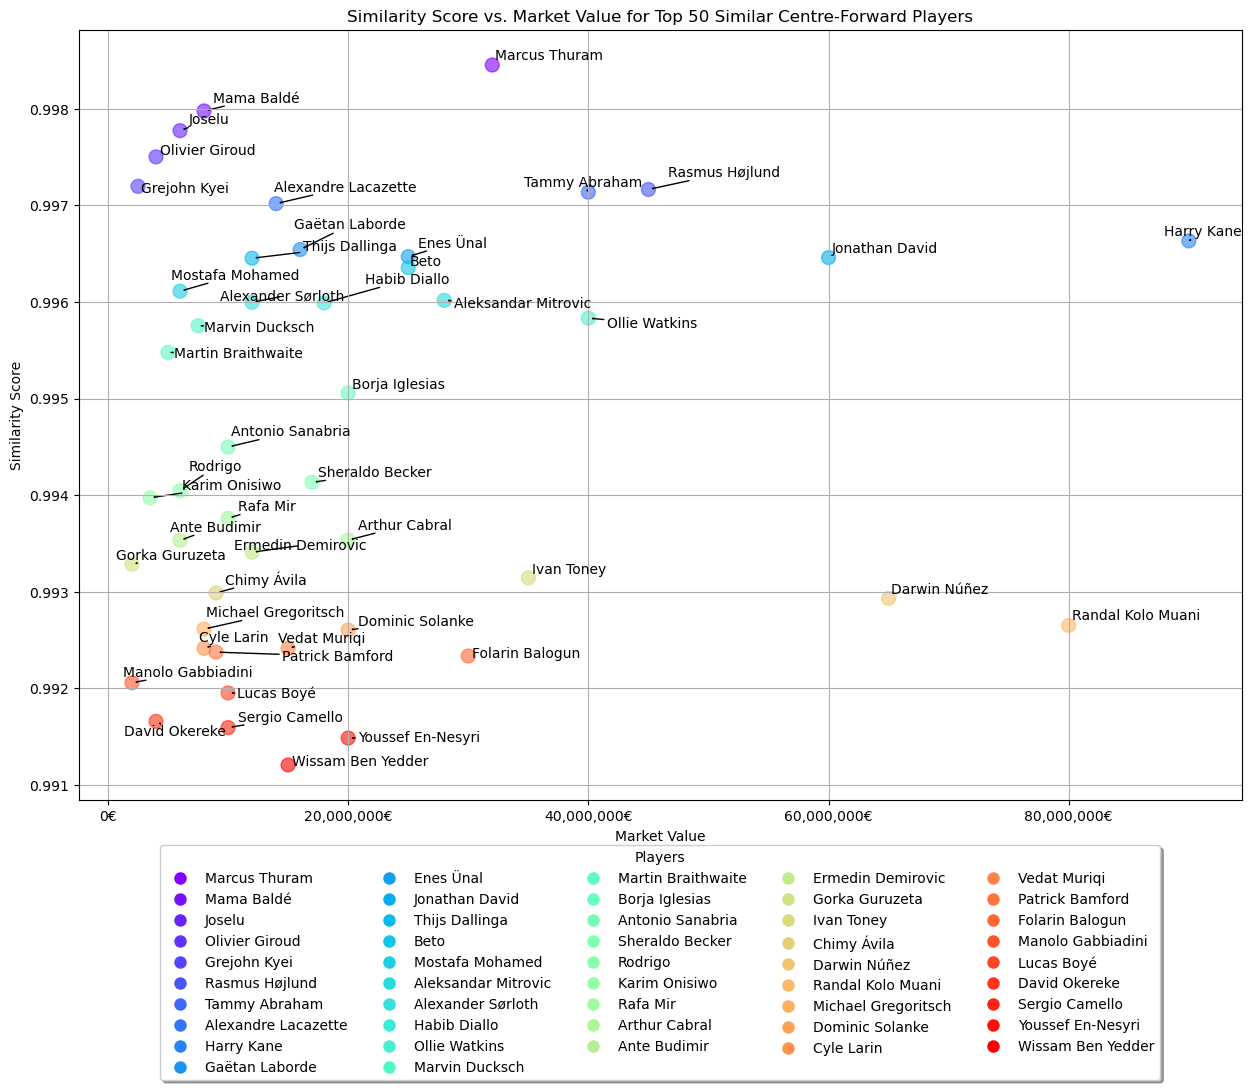

In [34]:
top_position_groups, top_teams = group_top_teams_by_position(players_totals, teams_stats)
bottom_position_groups = group_lower_teams_by_position_per_league(players_totals, teams_stats)

top_players_stats = players_totals[players_totals['team_name'].isin(top_teams)]
bottom_players_stats = players_totals[~players_totals['team_name'].isin(top_teams)]

most_similar_players, similarity_scores = find_similar_players(top_players_stats, top_position_groups, bottom_players_stats, bottom_position_groups, TARGET, N_MOST_SIMILAR_PLAYERS)

top_players_stats_filtered = top_players_stats[top_players_stats['player_name'].isin(top_position_groups[TARGET])]
similar_players_stats = bottom_players_stats[bottom_players_stats['player_name'].isin(most_similar_players['player_name'])]

plot_data = most_similar_players[['player_name', 'Market Value']].copy()
plot_data['Similarity Score'] = similarity_scores
plot_data.dropna(subset=['Market Value', 'Similarity Score'], inplace=True)

unique_players = plot_data['player_name'].unique()
color_map = plt.cm.get_cmap('rainbow', len(unique_players))
player_colors = {player: color_map(i) for i, player in enumerate(unique_players)}

plt.figure(figsize=(15, 10))
scatter = plt.scatter(x=plot_data['Market Value'], y=plot_data['Similarity Score'], s=100, c=[player_colors[name] for name in plot_data['player_name']], alpha=0.6)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in player_colors.values()]
plt.legend(handles, player_colors.keys(), title='Players', loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Market Value'], row['Similarity Score'], row['player_name']))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}€'.format(x)))

plt.xlabel('Market Value')
plt.ylabel('Similarity Score')
plt.title(f'Similarity Score vs. Market Value for Top {N_MOST_SIMILAR_PLAYERS} Similar {TARGET} Players')
plt.grid(True)
plt.show()

# 유사도로 선별된 선수들 중 시장가치가 가장 높은 선수와 시장가치가 낮으나 유사도가 가장 높은 선수들의 스탯을 시각화

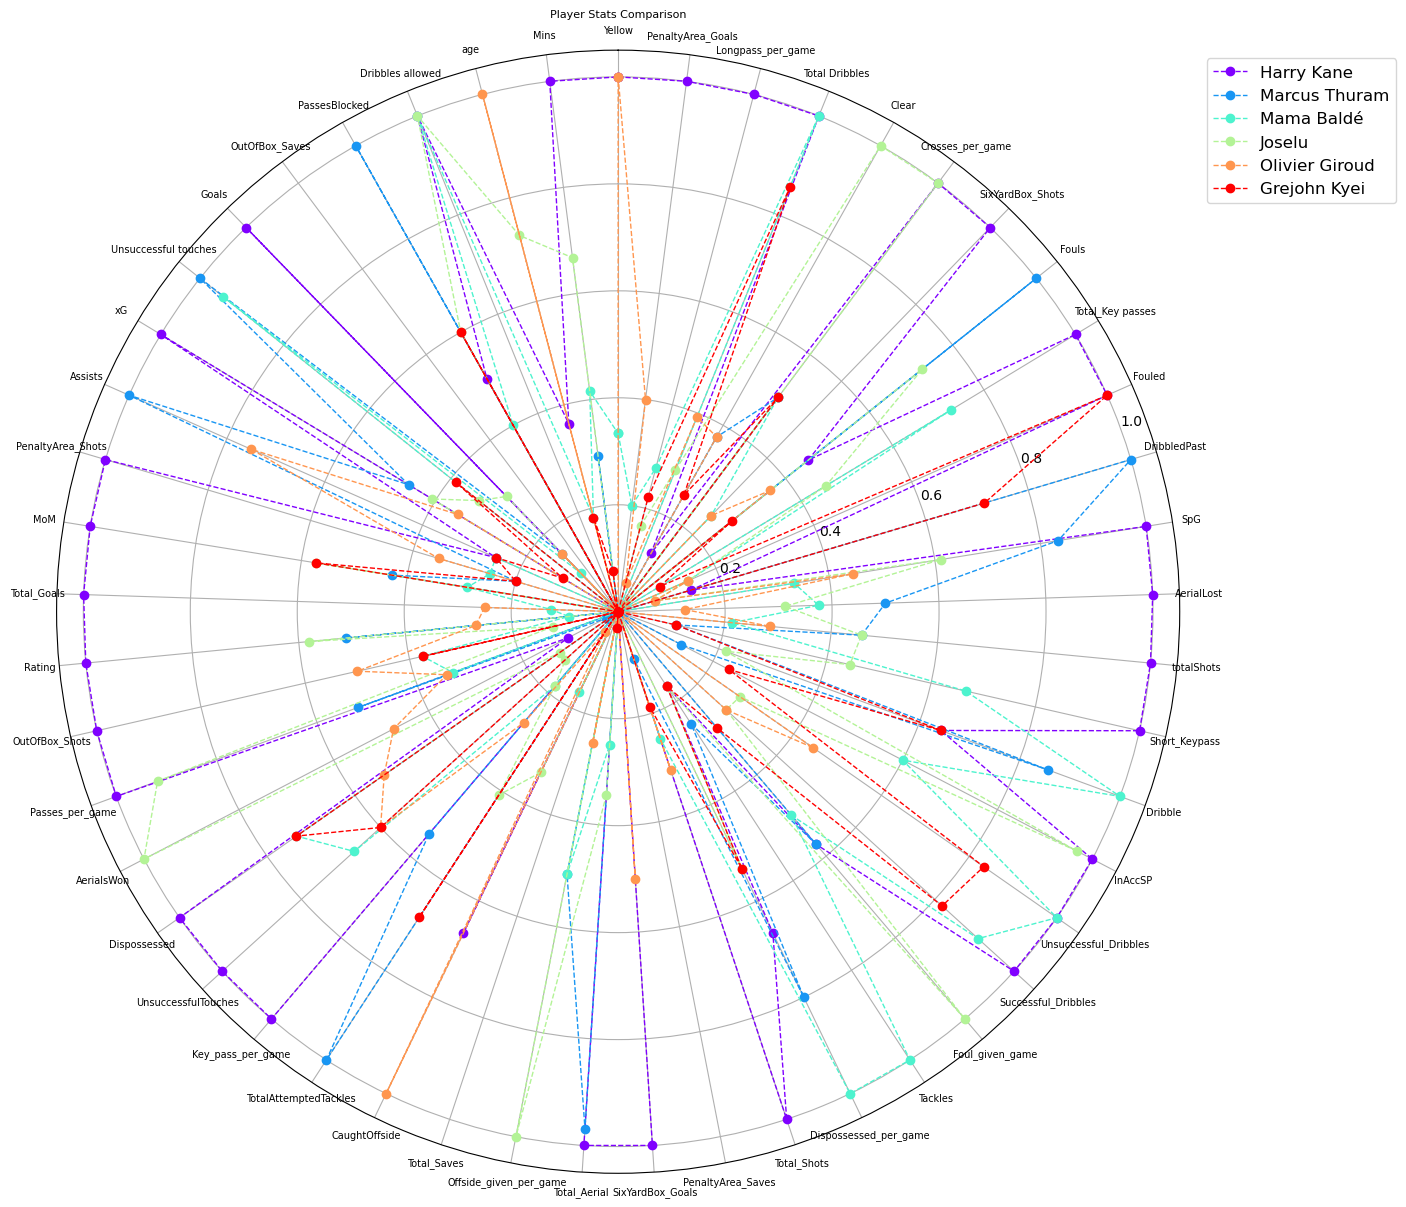

In [35]:
# 시장 가치가 가장 높은 선수 찾기
top_market_value_player = similar_players_stats.loc[similar_players_stats['Market Value'].idxmax()]

# 시장 가치가 낮지만 유사도가 높은 상위 10명의 선수 찾기
# similar_players_stats_sorted = similar_players_stats.sort_values('Market Value')
merged_data = pd.merge(similar_players_stats, plot_data[['player_name', 'Similarity Score']], on='player_name', how='left')
sorted_data = merged_data.sort_values('Similarity Score', ascending=False)
top_10_similar_players = sorted_data.head(5)

# 선택된 선수들의 스탯을 저장할 데이터프레임 생성
selected_players_stats = pd.concat([top_market_value_player.to_frame().T, top_10_similar_players], ignore_index=True)

def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-10)

# 그래프 그리기
stat_columns = STATS_PER_POSITION[TARGET] + ['age', 'Mins']
selected_players_stats_normalized = selected_players_stats[stat_columns].apply(normalize)

# stat_columns에 맞는 각도 생성
angles = np.linspace(0, 2 * np.pi, len(stat_columns), endpoint=False).tolist()
angles += angles[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
colors = plt.cm.rainbow(np.linspace(0, 1, len(selected_players_stats)))

for i, player in enumerate(selected_players_stats['player_name']):
    player_stats = selected_players_stats_normalized.iloc[i].values.flatten().tolist()
    player_stats += player_stats[:1]
    ax.plot(angles, player_stats, linewidth=1, linestyle='--', marker='o', color=colors[i], label=player)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(70)
ax.set_thetagrids(np.degrees(angles[:-1]), labels=stat_columns, fontsize=7)
ax.set_title("Player Stats Comparison", fontsize=8)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=12)

plt.tight_layout()
plt.show()